## Ecocity starting kit

The challenge that is posed to you is to use weather data (temperature, humidity, cloud cover) to predict the number of bikes rented at given station for a given day. To make the challenge more interesting, predictions are asked either in the morning or in the afternoon.

## Fetch the data and load it

In [46]:
codedir = 'sample_code/'
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'bikes'
basename = datadir  + dataname
!ls $basename*

public_data/bikes_feat.name   public_data/bikes_train.data
public_data/bikes_label.name  public_data/bikes_train.solution
public_data/bikes_test.data   public_data/bikes_valid.data


In [47]:
import data_io
import eval
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/bikes_train from AutoML format
Number of examples = 95236
Number of features = 11


## Show the first five rows

In [48]:
data

,Moment_of_the_day,station_id,date_(m/d/y),average_duration_(s),season,temperature_(F),humidity,visibility,wind,cloud cover,precipitation_(mm),target
0,2,32,792,314.333333,0,67.8,60.8,10.0,6.6,1.2,0.000,3
1,1,58,386,402.000000,0,53.8,57.0,10.0,3.0,0.2,0.000,1
2,0,69,743,452.000000,0,49.0,78.0,10.0,3.0,3.0,0.000,1
3,2,57,135,481.200000,2,57.6,65.8,10.0,9.6,5.6,0.000,10
4,3,76,137,568.750000,2,55.4,68.6,10.0,3.6,0.6,0.000,4
5,1,41,525,270.000000,3,48.8,71.8,10.0,3.8,2.8,0.000,3
6,2,25,500,643.000000,2,60.6,68.2,10.0,3.8,0.2,0.000,1
7,0,39,734,477.000000,0,47.6,69.0,10.0,2.0,2.6,0.000,1
8,2,6,492,355.000000,2,61.8,73.6,10.0,1.4,2.6,0.000,4
9,1,45,487,419.875000,2,66.0,67.0,10.0,7.0,4.8,0.000,8


## Show statistics for each column

In [49]:
data.describe()

,Moment_of_the_day,station_id,date_(m/d/y),average_duration_(s),season,temperature_(F),humidity,visibility,wind,cloud cover,precipitation_(mm),target
count,95236.000000,95236.000000,95236.000000,9.523600e+04,95236.000000,95236.000000,95236.000000,95236.0,95236.000000,95236.000000,95236.000000,95236.000000
mean,1.658207,49.444968,458.388404,1.539710e+03,0.985531,60.566674,66.816689,10.0,5.939880,2.788011,0.020582,5.972815
std,0.951434,22.270579,209.390801,5.657068e+04,1.031860,6.689039,10.237596,0.0,2.810571,2.040308,0.113006,7.599249
min,0.000000,2.000000,96.000000,6.100000e+01,0.000000,20.000000,24.000000,10.0,0.000000,0.000000,0.000000,1.000000
25%,1.000000,35.000000,390.000000,3.983333e+02,0.000000,56.000000,62.000000,10.0,3.800000,1.000000,0.000000,1.000000
50%,2.000000,55.000000,450.000000,5.430000e+02,1.000000,60.200000,68.400000,10.0,6.000000,2.600000,0.000000,3.000000
75%,2.000000,67.000000,512.000000,7.787649e+02,2.000000,65.800000,73.000000,10.0,7.800000,4.200000,0.000000,8.000000
max,3.000000,84.000000,795.000000,1.727040e+07,3.000000,84.000000,96.000000,10.0,23.000000,8.000000,3.360000,99.000000


## Data visualization
Import the Matplotlib and Seaborn libraries to plot distributions of rented bikes as functions of the temperature and of the mean temperature.

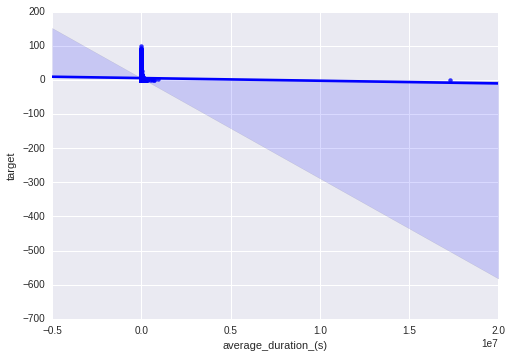

In [50]:
import matplotlib.pyplot as plt


sns.regplot(x = 'average_duration_(s)', y = 'target', data = data, color = 'Blue')


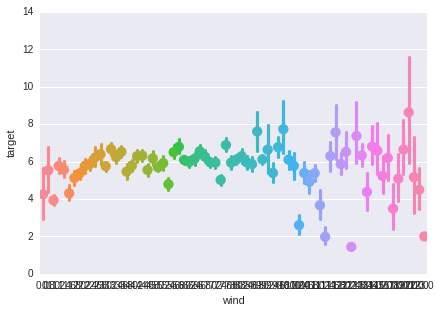

In [51]:
import numpy as np
sns.factorplot('wind', 'target', hue = 'wind', estimator = np.mean, data = data, 
             size = 4.5, aspect = 1.4)

In [52]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(data)[0]

array([   2.        ,   32.        ,  792.        ,  314.33333333,
          0.        ,   67.8       ,   60.8       ,    6.6       ,
          1.2       ,    3.        ])

## Building a predictive model
Let's start by converting the training set from a Pandas DataFrame to a NumPy Array, loading the validation and test data (which we have to predict values for) and finally getting rid of the date column.

In [53]:
# Training data
X_train = data.drop('target', axis=1)# This is the data matrix you already loaded (training data)
X_train = X_train.drop('date_(m/d/y)', axis=1).values            
# The target values encoded as categorical variables
y_train = data['target'].values                         
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_valid = data_io.read_as_df(basename, 'valid')
X_valid = X_valid.drop('date_(m/d/y)', axis=1).values            # Validation data
X_test = data_io.read_as_df(basename, 'test')
X_test = X_test.drop('date_(m/d/y)', axis=1).values            # This is the data matrix you already loaded (training data)

Dimensions X_train= (95236, 10) y_train= (95236,)
Reading public_data/bikes_valid from AutoML format
Number of examples = 5098
Number of features = 11
Reading public_data/bikes_test from AutoML format
Number of examples = 10350
Number of features = 11


Let's import the initial estimator of the starting kit (it is located in the `sample_code` directory).

In [92]:
import regressor
reload(regressor)                               # If you make changes to your code you have to reload it
from regressor import Regressor
Regressor??

Train, run, and save your regressor and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority 
* (1) use saved predictions
* (2) if no predictions, use saved model, do not retrain, just test; 
* (3) if neither, train and test model from scratch. 

Compute the predictions with predict_proba, this is more versatile.

In [93]:
result_dir = 'res/'
outname = result_dir + dataname
clf = Regressor()
clf.fit(X_train, y_train)
Y_predict = clf.predict(X_train) 
print 'Fold', 'training accuracy = ', eval.rmsle(Y_predict, y_train)
Y_valid = clf.predict(X_valid) 
Y_test = clf.predict(X_test) 
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

Fold training accuracy =  0.0
res/bikes_model.pickle	res/bikes_test.predict	res/bikes_valid.predict


## Training and cross-validating the model
Train the `Regressor` object by calling it's `fit` function, then use the `predict` function to get the predicted values. Using these, compute the training accuracy on the **test set** for each of the 5 splits of the train data.

**Nota Bene**: Scikit-learn does not have the `rmsle` metric, we have to call the function computing this score from the `eval.pyc` file.

In [94]:
from sklearn.cross_validation import KFold

kf = KFold(X_train.shape[0], n_folds=5)

for train_index, test_index in kf:
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]
    clf = Regressor()
    clf.fit(Xtrain, ytrain)
    Y_predict = clf.predict(Xtest)
    print 'Fold', 'validation accuracy = ', eval.rmsle(Y_predict, ytest)

Fold validation accuracy =  0.627939641327
Fold validation accuracy =  0.630244859535
Fold validation accuracy =  0.63233574616
Fold validation accuracy =  0.629582202102
Fold validation accuracy =  0.628283796544


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: 
* (1) If results are found, then are copied to the output directory; 
* (2) If no results but a trained model is found, it is reloaded and no training occurs; 
* (3) If nothing is found a fresh model is trained and tested.

In [90]:
outdir = '../outputs'         # If you use result_dir as output directory, your submission will include your results

In [91]:
!python run.py $datadir $outdir

Using input_dir: public_data/
Using output_dir: /home/swann.raynal/Bureau/MiniProjet/outputs
************************************************************************
****** Attempting to copy files (from res/) for RESULT submission ******
************************************************************************
[+] Bikes copied
[+] Results copied to output directory, no model trained/tested
========= Zipping this directory to prepare for submit ==============
See: ../sample_submission_17-03-17-09-59.zip
[+] Done
[+] Overall time spent  9.67 sec ::  Overall time budget  0.00 sec


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.